In [1]:
#This block is for me to run in Google colab
from google.colab import drive
drive.mount("/content/drive")

import sys
sys.path.insert(0,"/content/drive/My Drive/Research/Coherent One Shot Hamiltonian Simulation")

!pip install cirq

Mounted at /content/drive
     |████████████████████████████████| 328 kB 24.3 MB/s 
     |████████████████████████████████| 1.5 MB 86.5 MB/s 
     |████████████████████████████████| 55 kB 3.0 MB/s 
     |████████████████████████████████| 47 kB 3.4 MB/s 
     |████████████████████████████████| 409 kB 91.5 MB/s 
     |████████████████████████████████| 1.3 MB 69.9 MB/s 
     |████████████████████████████████| 220 kB 93.9 MB/s 
     |████████████████████████████████| 97 kB 6.4 MB/s 
     |████████████████████████████████| 52 kB 1.1 MB/s 
     |████████████████████████████████| 10.1 MB 58.4 MB/s 
     |████████████████████████████████| 49 kB 4.9 MB/s 
     |████████████████████████████████| 53 kB 1.5 MB/s 
     |████████████████████████████████| 65 kB 3.1 MB/s 
     |████████████████████████████████| 43 kB 1.5 MB/s 
     |████████████████████████████████| 15.7 MB 178 kB/s 
     |████████████████████████████████| 229 kB 76.6 MB/s 
     |████████████████████████████████| 28.5 MB 49 kB/s 
    

In [2]:
# Import packages
from qsp_models import *
import tensorflow as tf
import numpy as np

# visualization tools
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit
import scipy
import IPython
from scipy.special import lambertw

sns.set(font_scale=1.5)
plt.rcParams['figure.figsize'] = [15, 7]

In [3]:
#Hamiltonian Properties

h1 = 0
h2 =0
gx = 1
gy = 0
gz = 0

eigenvals = np.array([-gz-(gx**2+2*gx*gy+gy**2+h1**2-2*h1*h2+h2**2)**0.5, 
                      -gz+(gx**2+2*gx*gy+gy**2+h1**2-2*h1*h2+h2**2)**0.5,
                      gz-(gx**2+2*gx*gy+gy**2+h1**2-2*h1*h2+h2**2)**0.5,
                      gz+(gx**2+2*gx*gy+gy**2+h1**2-2*h1*h2+h2**2)**0.5])
alpha = max(np.abs(eigenvals))

## Finding Phase Angles for Cosine

Epoch 1/500
2/2 - 25s - loss: 0.8376 - qsp_3_loss: 0.6207 - qsp_3_1_loss: 0.2169
Epoch 2/500
2/2 - 0s - loss: 0.7617 - qsp_3_loss: 0.5833 - qsp_3_1_loss: 0.1784
Epoch 3/500
2/2 - 0s - loss: 0.6738 - qsp_3_loss: 0.5268 - qsp_3_1_loss: 0.1471
Epoch 4/500
2/2 - 0s - loss: 0.5973 - qsp_3_loss: 0.4791 - qsp_3_1_loss: 0.1182
Epoch 5/500
2/2 - 0s - loss: 0.5132 - qsp_3_loss: 0.4195 - qsp_3_1_loss: 0.0937
Epoch 6/500
2/2 - 0s - loss: 0.4413 - qsp_3_loss: 0.3675 - qsp_3_1_loss: 0.0738
Epoch 7/500
2/2 - 0s - loss: 0.3713 - qsp_3_loss: 0.3142 - qsp_3_1_loss: 0.0570
Epoch 8/500
2/2 - 0s - loss: 0.3157 - qsp_3_loss: 0.2717 - qsp_3_1_loss: 0.0440
Epoch 9/500
2/2 - 0s - loss: 0.2718 - qsp_3_loss: 0.2386 - qsp_3_1_loss: 0.0332
Epoch 10/500
2/2 - 0s - loss: 0.2316 - qsp_3_loss: 0.2051 - qsp_3_1_loss: 0.0265
Epoch 11/500
2/2 - 0s - loss: 0.2036 - qsp_3_loss: 0.1819 - qsp_3_1_loss: 0.0217
Epoch 12/500
2/2 - 0s - loss: 0.1803 - qsp_3_loss: 0.1608 - qsp_3_1_loss: 0.0195
Epoch 13/500
2/2 - 0s - loss: 0.1623

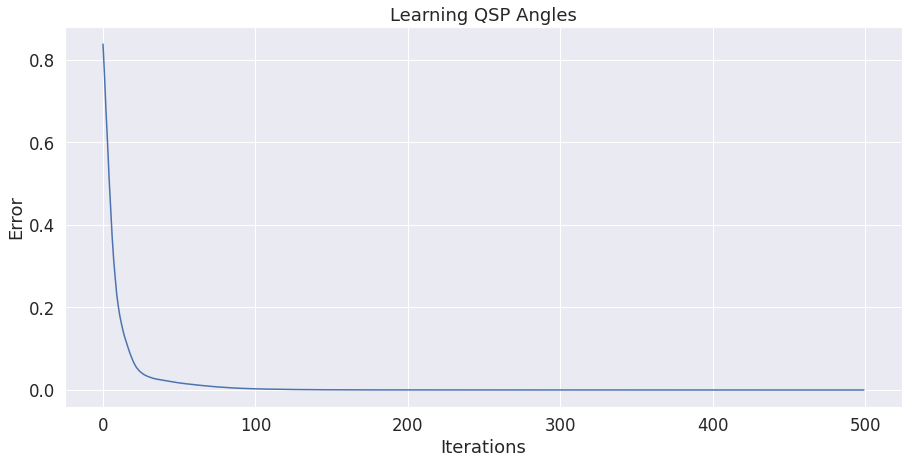

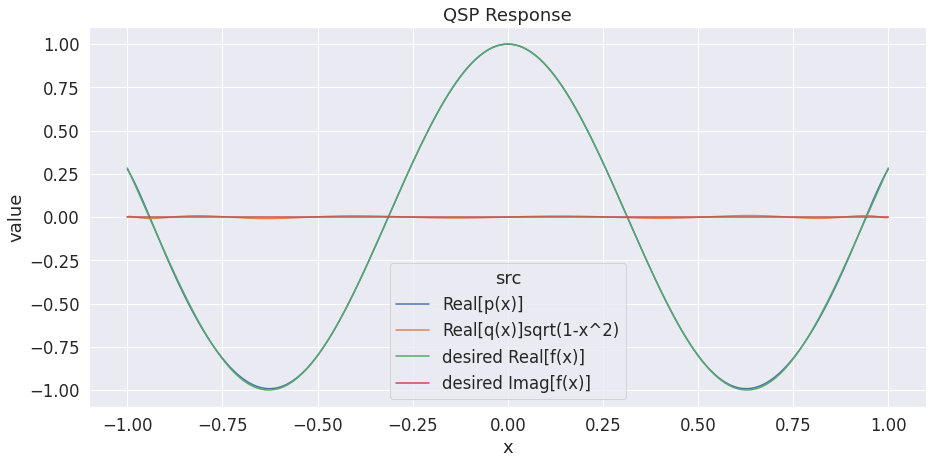

In [7]:
# Simulation setup
t = 5
tau = t*alpha

# Polynomial setup
poly_deg = 16   # Make sure to choose an even degree for sine
convention = 1    #|+><+| convention
f_real = lambda x: np.cos(tau * x)
f_imag = lambda x: 0*x

# The intput theta training values 
th_in = np.linspace(0, np.pi, 50)
th_in = tf.reshape(th_in, (th_in.shape[0], 1))

# We desire p(x) to be f(x)
expected_outputs = [f_real(np.cos(th_in)), f_imag(np.cos(th_in))]

# Train the model
model = construct_qsp_model(poly_deg, convention)
history = model.fit(x=th_in, y=expected_outputs, epochs=500, verbose=2)
plot_loss(history)
plot_qsp_response(f_real, f_imag, model, convention)

In [8]:
#Output QSP phases
phis = model.trainable_weights[0].numpy()
phis

array([[ 2.0994425 ],
       [ 0.10617886],
       [ 1.536831  ],
       [ 2.866334  ],
       [ 0.89175516],
       [ 2.846612  ],
       [ 1.9755667 ],
       [ 2.3449678 ],
       [ 1.8965209 ],
       [ 2.102166  ],
       [ 2.1125991 ],
       [ 2.4766757 ],
       [ 0.11341345],
       [ 0.48833814],
       [ 2.6220188 ],
       [-0.02579686],
       [-0.03002616]], dtype=float32)

In [11]:
# Maximum error of the approximation
qsp_circuit = QSPCircuit(phis)
circuit_px = qsp_circuit.eval_px(th_in)
circuit_qx = qsp_circuit.eval_qx(th_in)
circuit_response = np.real(circuit_px) + 1j*np.real(circuit_qx)
expected_response = expected_outputs[0][:,0] + 1j*expected_outputs[1][:,0]
deviations = np.absolute(circuit_response - expected_response)

# Worst case and average case errors
epsilon_max = np.max(deviations)
epsilon_mean = np.mean(deviations)

print(epsilon_max)

0.011546955302294621


## Finding Phase Angles for Sine

Epoch 1/500
2/2 - 24s - loss: 1.8582 - qsp_4_loss: 1.5304 - qsp_4_1_loss: 0.3279
Epoch 2/500
2/2 - 0s - loss: 1.7629 - qsp_4_loss: 1.4261 - qsp_4_1_loss: 0.3368
Epoch 3/500
2/2 - 0s - loss: 1.6735 - qsp_4_loss: 1.3224 - qsp_4_1_loss: 0.3511
Epoch 4/500
2/2 - 0s - loss: 1.5717 - qsp_4_loss: 1.2059 - qsp_4_1_loss: 0.3658
Epoch 5/500
2/2 - 0s - loss: 1.4886 - qsp_4_loss: 1.1136 - qsp_4_1_loss: 0.3750
Epoch 6/500
2/2 - 0s - loss: 1.4041 - qsp_4_loss: 1.0196 - qsp_4_1_loss: 0.3845
Epoch 7/500
2/2 - 0s - loss: 1.3302 - qsp_4_loss: 0.9411 - qsp_4_1_loss: 0.3891
Epoch 8/500
2/2 - 0s - loss: 1.2688 - qsp_4_loss: 0.8783 - qsp_4_1_loss: 0.3905
Epoch 9/500
2/2 - 0s - loss: 1.2110 - qsp_4_loss: 0.8201 - qsp_4_1_loss: 0.3909
Epoch 10/500
2/2 - 0s - loss: 1.1520 - qsp_4_loss: 0.7645 - qsp_4_1_loss: 0.3874
Epoch 11/500
2/2 - 0s - loss: 1.1002 - qsp_4_loss: 0.7162 - qsp_4_1_loss: 0.3840
Epoch 12/500
2/2 - 0s - loss: 1.0502 - qsp_4_loss: 0.6728 - qsp_4_1_loss: 0.3775
Epoch 13/500
2/2 - 0s - loss: 1.0006

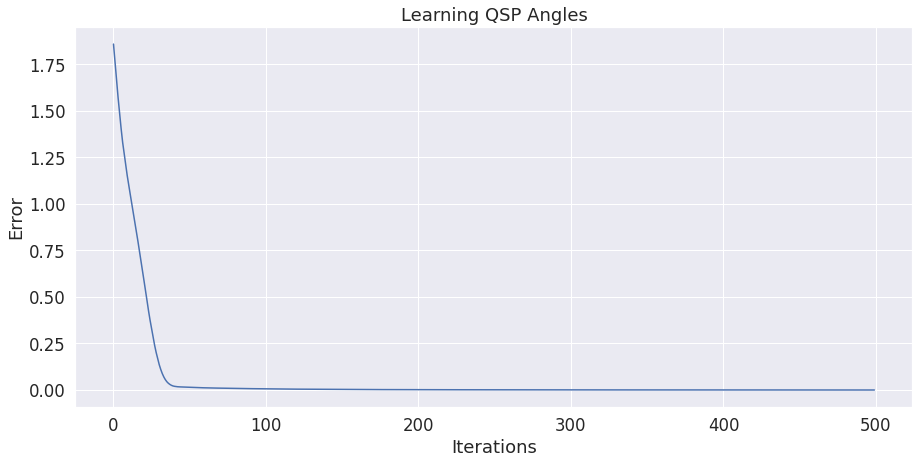

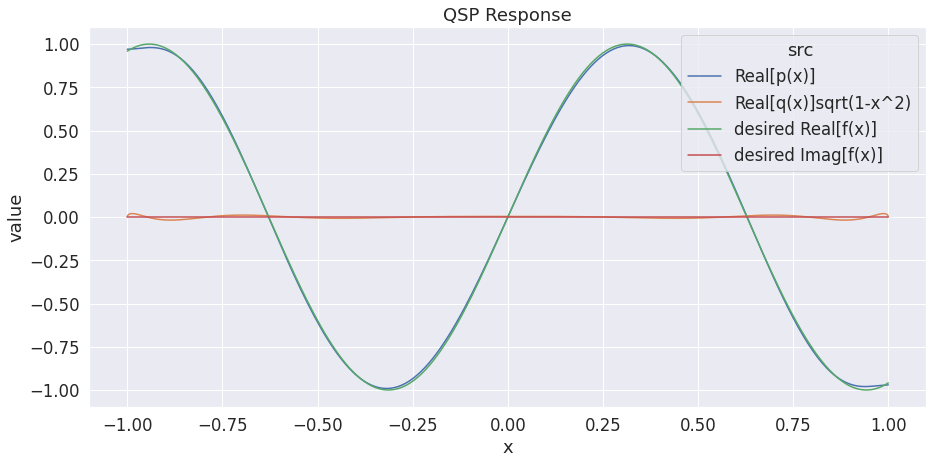

In [12]:
# Simulation setup
t = 5
tau = t*alpha

# Polynomial setup
poly_deg = 15   # Make sure to choose an odd degree for sine
convention = 1    #|+><+| convention
f_real = lambda x: np.sin(tau * x)
f_imag = lambda x: 0*x

# The intput theta training values 
th_in = np.linspace(0, np.pi, 50)
th_in = tf.reshape(th_in, (th_in.shape[0], 1))

# We desire p(x) to be f(x)
expected_outputs = [f_real(np.cos(th_in)), f_imag(np.cos(th_in))]

# Train the model
model = construct_qsp_model(poly_deg, convention)
history = model.fit(x=th_in, y=expected_outputs, epochs=500, verbose=2)
plot_loss(history)
plot_qsp_response(f_real, f_imag, model, convention)

In [13]:
#Output QSP phases
phis = model.trainable_weights[0].numpy()
phis

array([[ 1.5961444 ],
       [ 0.9532065 ],
       [ 1.8354834 ],
       [ 2.4987915 ],
       [ 2.587818  ],
       [ 1.6301075 ],
       [ 2.8076212 ],
       [ 1.4368781 ],
       [ 2.2970107 ],
       [ 0.56893456],
       [-0.15334706],
       [ 2.427855  ],
       [ 2.0800707 ],
       [ 2.674426  ],
       [ 0.17744464],
       [ 2.6123955 ]], dtype=float32)

In [14]:
# Maximum error of the approximation
qsp_circuit = QSPCircuit(phis)
circuit_px = qsp_circuit.eval_px(th_in)
circuit_qx = qsp_circuit.eval_qx(th_in)
circuit_response = np.real(circuit_px) + 1j*np.real(circuit_qx)
expected_response = expected_outputs[0][:,0] + 1j*expected_outputs[1][:,0]
deviations = np.absolute(circuit_response - expected_response)

# Worst case and average case errors
epsilon_max = np.max(deviations)
epsilon_mean = np.mean(deviations)

print(epsilon_max)

0.020745488346547738
